<a href="https://colab.research.google.com/github/aayushiagg/Cat-and-dog-classifier-Keras-Deep_learning-/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [0]:
img_width = 150
img_height = 150

train_data_dir = 'image_data/training'
validation_data_dir = 'image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 10
batch_size = 30

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output train_generator = train_datagen.flow_from_directory(
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 198 images belonging to 2 classes.


In [0]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


20
1.0


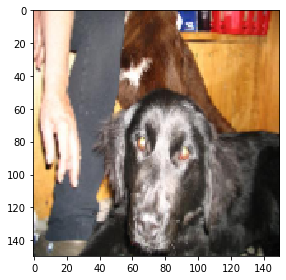

0.0


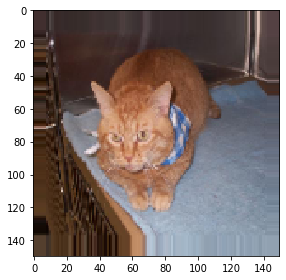

1.0


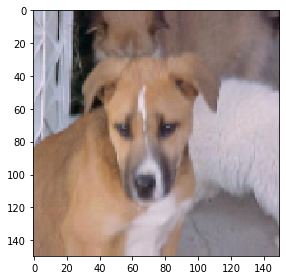

0.0


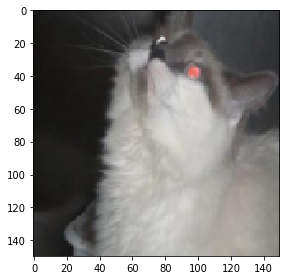

1.0


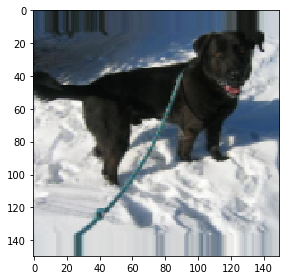

1.0


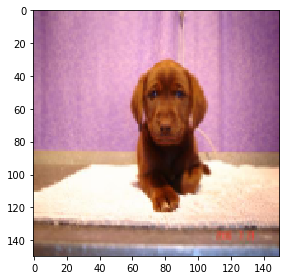

1.0


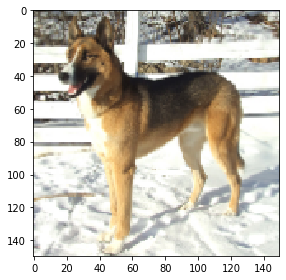

0.0


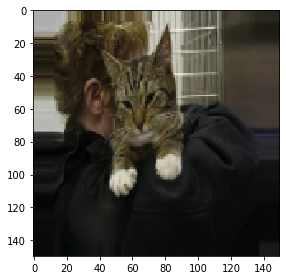

1.0


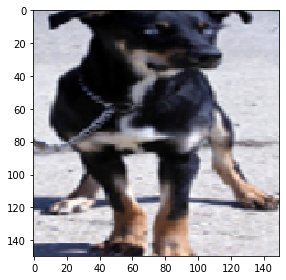

0.0


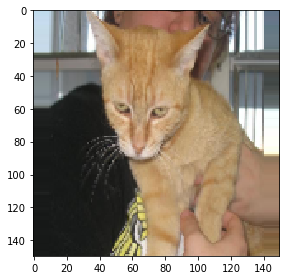

0.0


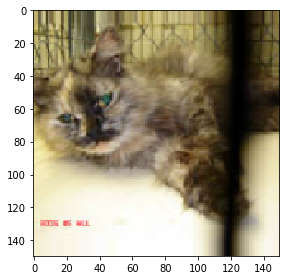

1.0


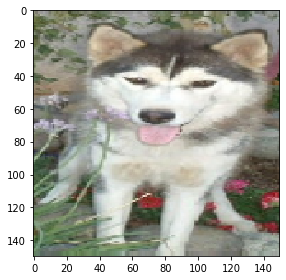

1.0


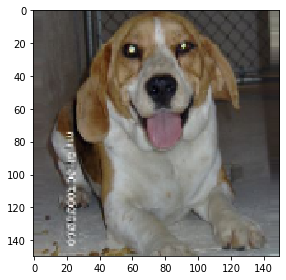

1.0


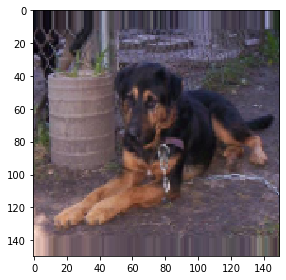

0.0


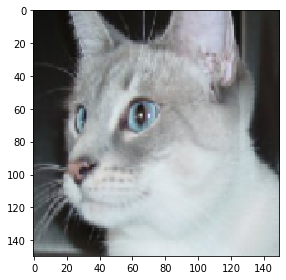

0.0


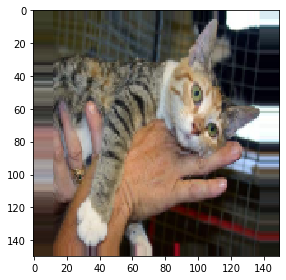

1.0


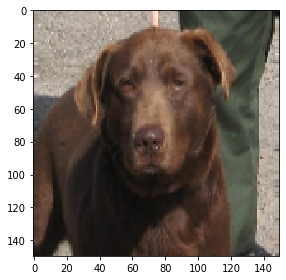

1.0


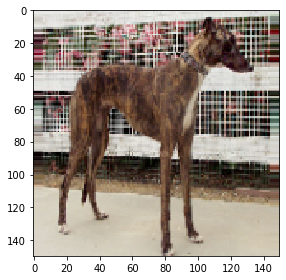

0.0


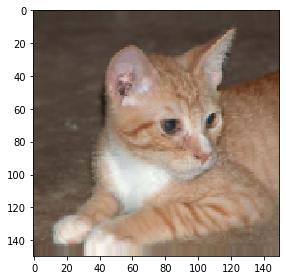

1.0


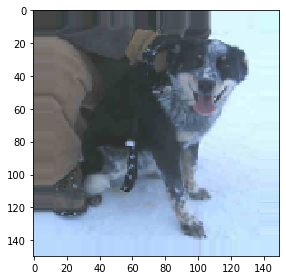

In [0]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [0]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [0]:
#model.compile(optimizer="adam",loss= "binary_crossentropy")
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])


In [68]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples ,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples )

Epoch 1/10
120/120 [==============================] - 82s 687ms/step - loss: 0.6907 - accuracy: 0.5210 - val_loss: 0.6940 - val_accuracy: 0.5900
Epoch 2/10
120/120 [==============================] - 81s 674ms/step - loss: 0.6645 - accuracy: 0.5968 - val_loss: 0.6338 - val_accuracy: 0.5800
Epoch 3/10
120/120 [==============================] - 81s 677ms/step - loss: 0.6239 - accuracy: 0.6490 - val_loss: 0.5577 - val_accuracy: 0.5900
Epoch 4/10
120/120 [==============================] - 86s 715ms/step - loss: 0.5773 - accuracy: 0.6881 - val_loss: 0.6517 - val_accuracy: 0.6500
Epoch 5/10
120/120 [==============================] - 81s 672ms/step - loss: 0.5274 - accuracy: 0.7294 - val_loss: 0.7068 - val_accuracy: 0.5800
Epoch 6/10
120/120 [==============================] - 81s 673ms/step - loss: 0.4849 - accuracy: 0.7601 - val_loss: 0.5813 - val_accuracy: 0.5900
Epoch 7/10
120/120 [==============================] - 81s 675ms/step - loss: 0.4286 - accuracy: 0.7950 - val_loss: 0.7116 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


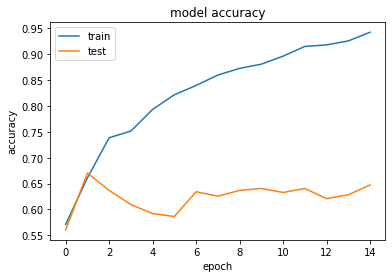

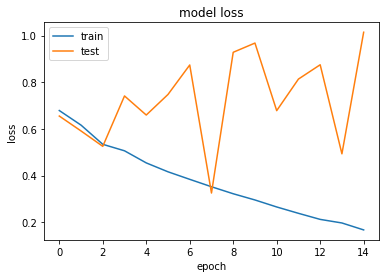

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [69]:
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['3285.jpg', '310.jpg', '2994.jpg', '234.jpg', '2658.jpg', '2512.jpg', '236.jpg', '3111.jpg']


In [70]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

3285.jpg: cat
310.jpg: dog
2994.jpg: dog
234.jpg: cat
2658.jpg: cat
2512.jpg: cat
236.jpg: cat
3111.jpg: dog
Total Dogs : 3
Total Cats : 5


In [0]:
cd /content/gdrive/My Drive/Colab Notebooks/image_data

/content/gdrive/My Drive/Colab Notebooks/image_data


In [0]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/image_data'

In [0]:
cd ..

/content/gdrive/My Drive/Colab Notebooks
